###Sources for Code used


https://github.com/jacobod/Baseball-Batting-and-Salary-Analysis-In-Python/blob/master/Baseball%20Data%20Analysis%20Project%20-%20Udacity.ipynb

https://www.kaggle.com/code/samfenske/ml-predicting-mlb-salaries

https://github.com/jwhoffman/predicting_MLB_player_salary/blob/master/Capstone_1_Slidedeck.pdf

https://github.com/tweichle/Clustering/blob/master/Clustering%20for%20Baseball%20Metrics.ipynb

### Import Python Functions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
import random
%matplotlib inline

from numpy import median

### Importing Data

In [ ]:
salaries = pd.read_csv('/content/Salaries.csv')
batting = pd.read_csv('/content/Batting.csv')
fielding = pd.read_csv('/content/Fielding.csv')
names= pd.read_csv('/content/People.csv')

###Cleansing and merging data

In [ ]:
#combining batting fielding and salaries
batting_sal = pd.merge(batting,salaries,on=['playerID','yearID'],how='inner')
batting_field_sal = pd.merge(batting_sal,fielding,on=['playerID','yearID'],how='inner')
#Converting player ID to actual name
pd.set_option('display.max_columns', None)

names['name']=names['nameFirst']+' '+names['nameLast']

names=names[['playerID','name']]
names
#getting rid of players that are pitchers
batting_field_sal=batting_field_sal[-batting_field_sal['POS'].isin(['P'])].reset_index().drop(columns='index')
batting_field_sal


#getting rid of players that have no salary
batting_field_sal = batting_field_sal[(batting_field_sal['salary'].isnull() == False)]
batting_field_sal.reset_index(inplace=True)
batting_field_sal.drop('index',axis=1)


,playerID,yearID,stint_x,teamID_x,lgID_x,G_x,AB,R,H,2B,3B,HR,RBI,SB_x,CS_x,BB,SO,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary,stint_y,teamID,lgID,POS,G_y,GS,InnOuts,PO,A,E,DP,PB,WP,SB_y,CS_y,ZR
0,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,3,6,21.0,1.0,0.0,22,26.0,5.0,6.0,4.0,3.0,7.0,PHI,NL,237000,1,PHI,NL,2B,17,3.0,192.0,27,25,1.0,5,NaN,NaN,NaN,NaN,NaN
1,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,3,6,21.0,1.0,0.0,22,26.0,5.0,6.0,4.0,3.0,7.0,PHI,NL,237000,1,PHI,NL,3B,7,3.0,126.0,4,16,0.0,1,NaN,NaN,NaN,NaN,NaN
2,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,3,6,21.0,1.0,0.0,22,26.0,5.0,6.0,4.0,3.0,7.0,PHI,NL,237000,1,PHI,NL,SS,60,36.0,1052.0,61,117,8.0,21,NaN,NaN,NaN,NaN,NaN
3,almonbi01,1985,1,PIT,NL,88,244,33,66,17,0,6,29.0,10.0,7.0,22,61.0,0.0,1.0,4.0,3.0,6.0,PIT,NL,255000,1,PIT,NL,1B,7,3.0,74.0,25,1,2.0,3,NaN,NaN,NaN,NaN,NaN
4,almonbi01,1985,1,PIT,NL,88,244,33,66,17,0,6,29.0,10.0,7.0,22,61.0,0.0,1.0,4.0,3.0,6.0,PIT,NL,255000,1,PIT,NL,3B,7,4.0,111.0,2,4,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28555,zimmery01,2016,1,WAS,NL,115,427,60,93,18,1,15,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0,WAS,NL,14000000,1,WAS,NL,1B,114,108.0,2907.0,852,44,4.0,88,NaN,NaN,NaN,NaN,NaN
28556,zobribe01,2016,1,CHN,NL,147,523,94,142,31,3,18,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0,CHN,NL,10500000,1,CHN,NL,1B,1,0.0,1.0,1,0,0.0,0,NaN,NaN,NaN,NaN,NaN
28557,zobribe01,2016,1,CHN,NL,147,523,94,142,31,3,18,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0,CHN,NL,10500000,1,CHN,NL,2B,119,113.0,2929.0,177,250,7.0,52,NaN,NaN,NaN,NaN,NaN
28558,zobribe01,2016,1,CHN,NL,147,523,94,142,31,3,18,76.0,6.0,4.0,96,82.0,6.0,4.0,4.0,4.0,17.0,CHN,NL,10500000,1,CHN,NL,OF,46,29.0,859.0,43,1,0.0,0,NaN,NaN,NaN,NaN,NaN


### Creating AVG, OBP, SLG, OPS Stats

In [ ]:
batting_field_sal['1B'] = (batting_field_sal['H']-((batting_field_sal['2B'])+(batting_field_sal['3B'])+(batting_field_sal['HR'])))

#batting average - how many hits a player has per at-bat
batting_field_sal['AVG'] = ((batting_field_sal['H'].apply(float))/(batting_field_sal['AB'].apply(float)))

#on-base percentage- how often a player reaches base [hits]+[walks]+[hit by pitch]/[at-bats]+[walks]+[hit by pitch]+[sacrifice flies]
batting_field_sal['OBP'] = (((batting_field_sal['H'].apply(float))+(batting_field_sal['BB'])+(batting_field_sal['HBP'])))/((batting_field_sal['AB'].apply(float))+(batting_field_sal['SF'])+(batting_field_sal['BB'])+(batting_field_sal['HBP']))

#slugging- total bases/at-bats: [Singles] + [Doubles] + [Triples x 2] + [Home Runs x 3])/At Bats
batting_field_sal['SLG'] = ((batting_field_sal['1B'])+(batting_field_sal['2B']*2)+(batting_field_sal['3B']*3)
                  +(batting_field_sal['HR']*4))/(batting_field_sal['AB'].apply(float))

#OPS - on base plus slugging
batting_field_sal['OPS'] = batting_field_sal['OBP']+batting_field_sal['SLG']

Since the data set only uses hits and the type of hits they are I added batting average, on base percentage, slugging, and on base percentage.  I have played baseball my whole life so the data in the datasets I have gives me all the information I need to calcualte all those statistics.  Instead of having to type it all out I found a project that already had it all typed out so I used the code and then adjusted it as needed.

### Cleaning out players that don't have hits and making at bats 125 or above

In [ ]:
batting_field_sal[batting_field_sal['AVG'].isnull()]
bfs = batting_field_sal.dropna(subset=['AVG'])
bfs = batting_field_sal[batting_field_sal['AB']>124]


### Making games started 75 or above

In [ ]:
bfs1 = bfs[bfs['GS']>74]

### Putting names into the data set

In [ ]:
bfs1['name']=[names[names['playerID'].isin([player])].reset_index()
                        ['name'][0] for player in bfs1['playerID']]
bfs1

<ipython-input-7-a08ea5fb1085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bfs1['name']=[names[names['playerID'].isin([player])].reset_index()


,index,playerID,yearID,stint_x,teamID_x,lgID_x,G_x,AB,R,H,2B,3B,HR,RBI,SB_x,CS_x,BB,SO,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary,stint_y,teamID,lgID,POS,G_y,GS,InnOuts,PO,A,E,DP,PB,WP,SB_y,CS_y,ZR,1B,AVG,OBP,SLG,OPS,name
7,7,armasto01,1985,1,BOS,AL,103,385,50,102,17,5,23,64.0,0.0,0.0,18,90.0,4.0,2.0,0.0,5.0,14.0,BOS,AL,915000,1,BOS,AL,OF,79,79.0,1962.0,173,3,3.0,1,NaN,NaN,NaN,NaN,NaN,57,0.264935,0.297561,0.514286,0.811847,Tony Armas
10,10,backmwa01,1985,1,NYN,NL,145,520,77,142,24,5,1,38.0,30.0,12.0,36,72.0,1.0,1.0,14.0,3.0,3.0,NYN,NL,200000,1,NYN,NL,2B,140,122.0,3384.0,272,370,7.0,76,NaN,NaN,NaN,NaN,NaN,112,0.273077,0.319643,0.344231,0.663874,Wally Backman
16,16,baineha01,1985,1,CHA,AL,160,640,86,198,29,3,22,113.0,1.0,1.0,42,89.0,8.0,1.0,0.0,10.0,23.0,CHA,AL,675000,1,CHA,AL,OF,159,158.0,4193.0,318,8,2.0,2,NaN,NaN,NaN,NaN,NaN,144,0.309375,0.347763,0.467187,0.814951,Harold Baines
19,19,balbost01,1985,1,KCA,AL,160,600,74,146,28,2,36,88.0,1.0,1.0,52,166.0,4.0,5.0,0.0,5.0,14.0,KCA,AL,205000,1,KCA,AL,1B,160,159.0,4284.0,1573,101,12.0,138,NaN,NaN,NaN,NaN,NaN,80,0.243333,0.306647,0.476667,0.783313,Steve Balboni
25,25,barfije01,1985,1,TOR,AL,155,539,94,156,34,9,27,84.0,22.0,8.0,66,143.0,5.0,4.0,0.0,3.0,14.0,TOR,AL,325000,1,TOR,AL,OF,154,152.0,4071.0,349,22,4.0,8,NaN,NaN,NaN,NaN,NaN,86,0.289425,0.369281,0.536178,0.905459,Jesse Barfield
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28540,28540,werthja01,2016,1,WAS,NL,143,525,84,128,28,0,21,69.0,5.0,1.0,71,139.0,0.0,4.0,0.0,6.0,17.0,WAS,NL,21733615,1,WAS,NL,OF,133,133.0,3474.0,201,5,1.0,1,NaN,NaN,NaN,NaN,NaN,79,0.243810,0.334983,0.417143,0.752126,Jayson Werth
28544,28544,wietema01,2016,1,BAL,AL,124,423,48,103,17,1,17,66.0,1.0,0.0,32,85.0,1.0,5.0,1.0,3.0,10.0,BAL,AL,15800000,1,BAL,AL,C,117,111.0,2941.0,871,50,11.0,6,1.0,NaN,43.0,23.0,NaN,68,0.243499,0.302376,0.408983,0.711359,Matt Wieters
28553,28553,yelicch01,2016,1,MIA,NL,155,578,78,172,38,3,21,98.0,9.0,4.0,72,138.0,4.0,4.0,0.0,5.0,20.0,MIA,NL,1000000,1,MIA,NL,OF,149,149.0,3957.0,260,6,6.0,1,NaN,NaN,NaN,NaN,NaN,110,0.297578,0.376328,0.482699,0.859027,Christian Yelich
28555,28555,zimmery01,2016,1,WAS,NL,115,427,60,93,18,1,15,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0,WAS,NL,14000000,1,WAS,NL,1B,114,108.0,2907.0,852,44,4.0,88,NaN,NaN,NaN,NaN,NaN,59,0.217799,0.271949,0.370023,0.641972,Ryan Zimmerman


### Analyzing and Looking at Data

In [ ]:
#@title Looking at Runs Batted In
bfs1['RBI'].describe()

count    6448.000000
mean       63.913927
std        26.448088
min         6.000000
25%        44.000000
50%        60.000000
75%        82.000000
max       165.000000
Name: RBI, dtype: float64

In [ ]:
#@title Looking at HR
bfs1['HR'].describe()

count    6448.000000
mean       15.269851
std        10.498484
min         0.000000
25%         7.000000
50%        13.000000
75%        22.000000
max        73.000000
Name: HR, dtype: float64

In [ ]:
#@title Looking at BB
bfs1['BB'].describe()

count    6448.000000
mean       47.521402
std        22.945066
min         3.000000
25%        31.000000
50%        44.000000
75%        60.000000
max       232.000000
Name: BB, dtype: float64

In [ ]:
#@title Looking at Batting Average
bfs1['AVG'].describe()

count    6448.000000
mean        0.271919
std         0.029980
min         0.166667
25%         0.251531
50%         0.271387
75%         0.291463
max         0.393795
Name: AVG, dtype: float64

In [ ]:
#@title Looking at On Base Percentage
bfs1['OBP'].describe()

count    6448.000000
mean        0.340329
std         0.038117
min         0.201439
25%         0.314323
50%         0.338388
75%         0.363795
max         0.609400
Name: OBP, dtype: float64

In [ ]:
#@title Looking at On Base plus Slugging
bfs1['OPS'].describe()

count    6448.000000
mean        0.772011
std         0.104609
min         0.447807
25%         0.700029
50%         0.764879
75%         0.833997
max         1.421733
Name: OPS, dtype: float64

In [ ]:
#@title Looking at Slugging
bfs1['SLG'].describe()

count    6448.000000
mean        0.431681
std         0.075170
min         0.220884
25%         0.379109
50%         0.426230
75%         0.477578
max         0.863445
Name: SLG, dtype: float64

The average for RBI: 63
The average for Batting AVG: .272
The average for OBP: .340
The average for OPS: .772
The average for SLG: .432

### Since salaries change over time im going to use a code found on github to look at the salaries with respect to the mean salary of that year

In [ ]:
def standardize(df):
    return (df - df.mean()) / (df.std())

bfs1['sal_z'] = bfs1.groupby('yearID')['salary'].apply(standardize)
bfs1['sal_z'].head()


<ipython-input-15-8b602157e725>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bfs1['sal_z'] = bfs1.groupby('yearID')['salary'].apply(standardize)


7     0.773829
10   -0.948919
16    0.195564
19   -0.936872
25   -0.647739
Name: sal_z, dtype: float64

In [ ]:
bfs1

,index,playerID,yearID,stint_x,teamID_x,lgID_x,G_x,AB,R,H,2B,3B,HR,RBI,SB_x,CS_x,BB,SO,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary,stint_y,teamID,lgID,POS,G_y,GS,InnOuts,PO,A,E,DP,PB,WP,SB_y,CS_y,ZR,1B,AVG,OBP,SLG,OPS,name,sal_z
7,7,armasto01,1985,1,BOS,AL,103,385,50,102,17,5,23,64.0,0.0,0.0,18,90.0,4.0,2.0,0.0,5.0,14.0,BOS,AL,915000,1,BOS,AL,OF,79,79.0,1962.0,173,3,3.0,1,NaN,NaN,NaN,NaN,NaN,57,0.264935,0.297561,0.514286,0.811847,Tony Armas,0.773829
10,10,backmwa01,1985,1,NYN,NL,145,520,77,142,24,5,1,38.0,30.0,12.0,36,72.0,1.0,1.0,14.0,3.0,3.0,NYN,NL,200000,1,NYN,NL,2B,140,122.0,3384.0,272,370,7.0,76,NaN,NaN,NaN,NaN,NaN,112,0.273077,0.319643,0.344231,0.663874,Wally Backman,-0.948919
16,16,baineha01,1985,1,CHA,AL,160,640,86,198,29,3,22,113.0,1.0,1.0,42,89.0,8.0,1.0,0.0,10.0,23.0,CHA,AL,675000,1,CHA,AL,OF,159,158.0,4193.0,318,8,2.0,2,NaN,NaN,NaN,NaN,NaN,144,0.309375,0.347763,0.467187,0.814951,Harold Baines,0.195564
19,19,balbost01,1985,1,KCA,AL,160,600,74,146,28,2,36,88.0,1.0,1.0,52,166.0,4.0,5.0,0.0,5.0,14.0,KCA,AL,205000,1,KCA,AL,1B,160,159.0,4284.0,1573,101,12.0,138,NaN,NaN,NaN,NaN,NaN,80,0.243333,0.306647,0.476667,0.783313,Steve Balboni,-0.936872
25,25,barfije01,1985,1,TOR,AL,155,539,94,156,34,9,27,84.0,22.0,8.0,66,143.0,5.0,4.0,0.0,3.0,14.0,TOR,AL,325000,1,TOR,AL,OF,154,152.0,4071.0,349,22,4.0,8,NaN,NaN,NaN,NaN,NaN,86,0.289425,0.369281,0.536178,0.905459,Jesse Barfield,-0.647739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28540,28540,werthja01,2016,1,WAS,NL,143,525,84,128,28,0,21,69.0,5.0,1.0,71,139.0,0.0,4.0,0.0,6.0,17.0,WAS,NL,21733615,1,WAS,NL,OF,133,133.0,3474.0,201,5,1.0,1,NaN,NaN,NaN,NaN,NaN,79,0.243810,0.334983,0.417143,0.752126,Jayson Werth,2.206909
28544,28544,wietema01,2016,1,BAL,AL,124,423,48,103,17,1,17,66.0,1.0,0.0,32,85.0,1.0,5.0,1.0,3.0,10.0,BAL,AL,15800000,1,BAL,AL,C,117,111.0,2941.0,871,50,11.0,6,1.0,NaN,43.0,23.0,NaN,68,0.243499,0.302376,0.408983,0.711359,Matt Wieters,1.335545
28553,28553,yelicch01,2016,1,MIA,NL,155,578,78,172,38,3,21,98.0,9.0,4.0,72,138.0,4.0,4.0,0.0,5.0,20.0,MIA,NL,1000000,1,MIA,NL,OF,149,149.0,3957.0,260,6,6.0,1,NaN,NaN,NaN,NaN,NaN,110,0.297578,0.376328,0.482699,0.859027,Christian Yelich,-0.837868
28555,28555,zimmery01,2016,1,WAS,NL,115,427,60,93,18,1,15,46.0,4.0,1.0,29,104.0,1.0,5.0,0.0,6.0,12.0,WAS,NL,14000000,1,WAS,NL,1B,114,108.0,2907.0,852,44,4.0,88,NaN,NaN,NaN,NaN,NaN,59,0.217799,0.271949,0.370023,0.641972,Ryan Zimmerman,1.071211


### Boxplots of Data

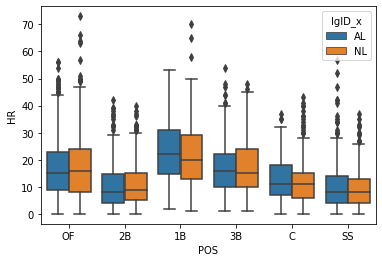

In [ ]:
sns.boxplot(x='POS', y='HR',hue='lgID_x',data=bfs1)

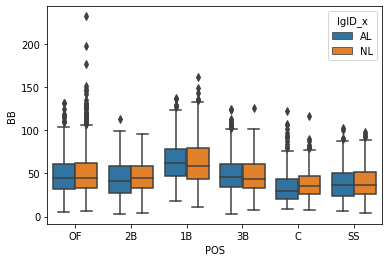

In [ ]:
sns.boxplot(x='POS', y='BB',hue='lgID_x',data=bfs1)

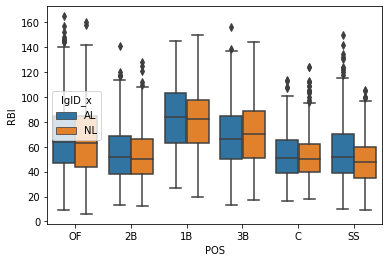

In [ ]:
sns.boxplot(x='POS', y='RBI',hue='lgID_x',data=bfs1)

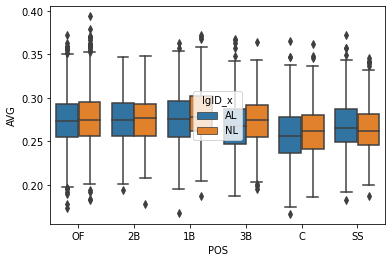

In [ ]:
sns.boxplot(x='POS', y='AVG',hue='lgID_x',data=bfs1)

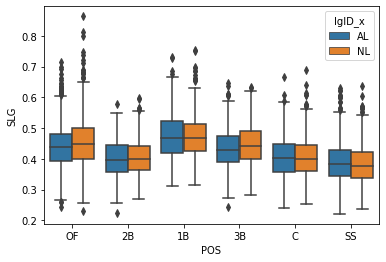

In [ ]:
sns.boxplot(x='POS', y='SLG', hue='lgID_x',data=bfs1)

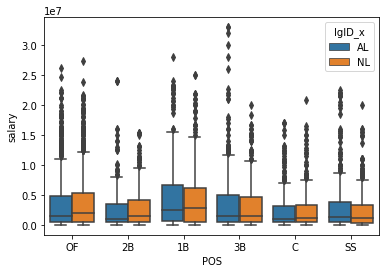

In [ ]:
sns.boxplot(x='POS', y='salary',hue='lgID_x',data=bfs1)

### Comparing Salary of original dataset with the one I created

Text(0.5, 1.0, 'Median Player Salary by year')

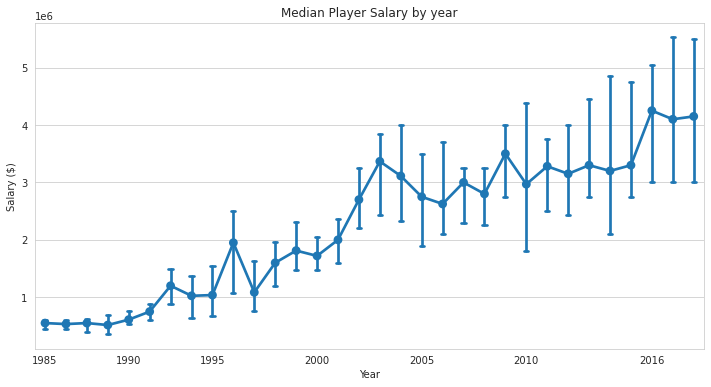

In [ ]:
sns.set_style('whitegrid')
labels = [1985,'','','',1990,'','','',1995,'','','','',2000,'','','','',2005,'','','','',2010,'','','','','',2016]

plt.figure(figsize=(12,6))
ax = sns.pointplot(x='yearID',y='salary',data=bfs1,estimator=median,capsize=.2,linestyles='-')
ax.set_xlabel('Year')
ax.set_ylabel('Salary ($)')
ax.set_xticklabels(labels)
ax.set_title('Median Player Salary by year')

Text(0.5, 1.0, 'Median Player Salary by year')

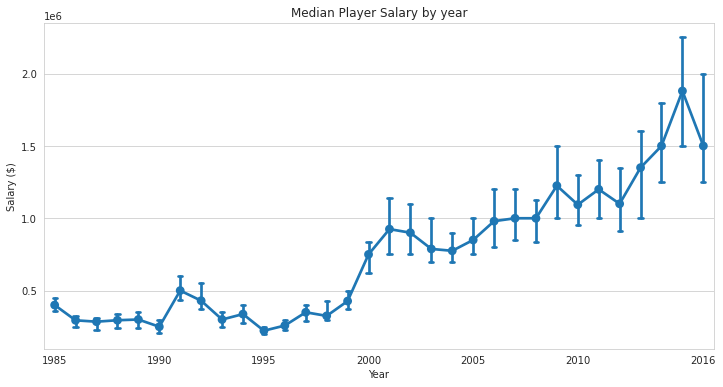

In [ ]:
sns.set_style('whitegrid')
labels = [1985,'','','','',1990,'','','','',1995,'','','','',2000,'','','','',2005,'','','','',2010,'','','','','',2016]

plt.figure(figsize=(12,6))
ax = sns.pointplot(x='yearID',y='salary',data=salaries,estimator=median,capsize=.2,linestyles='-')
ax.set_xlabel('Year')
ax.set_ylabel('Salary ($)')
ax.set_xticklabels(labels)
ax.set_title('Median Player Salary by year')

### Heat Map

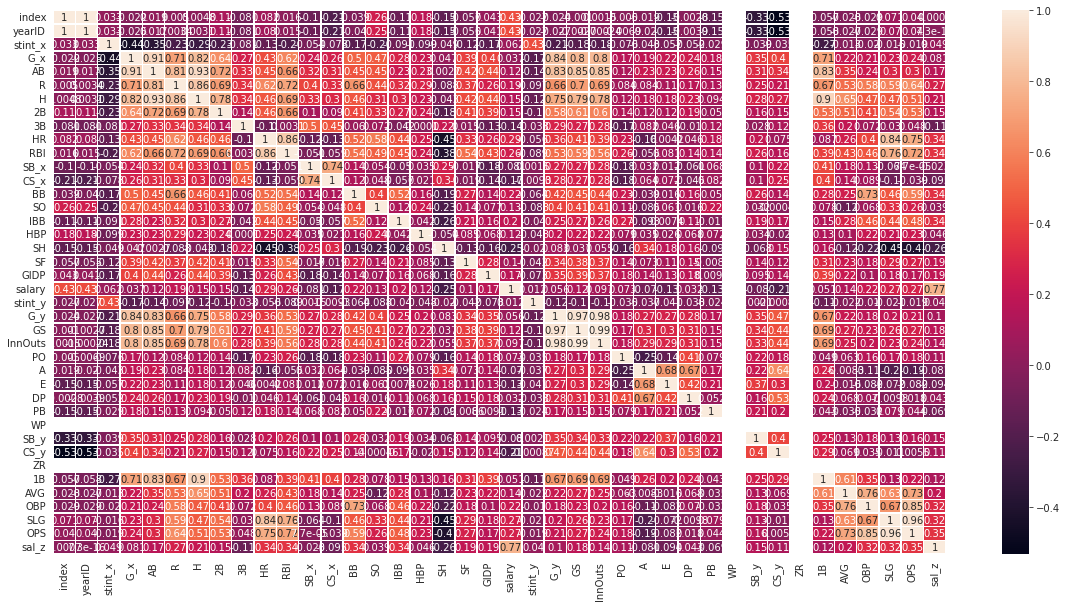

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(bfs1.corr(),annot=True,linewidth=0.5)

### Converting letters of positions to numbers of positions

In [ ]:
bfs_num = bfs1.replace(['C', '1B', '2B', '3B', 'SS', 'OF'], ['2','3','4','5','6','7'])
print(bfs_num)


       index   playerID  yearID  stint_x teamID_x lgID_x  G_x   AB   R    H  \
7          7  armasto01    1985        1      BOS     AL  103  385  50  102   
10        10  backmwa01    1985        1      NYN     NL  145  520  77  142   
16        16  baineha01    1985        1      CHA     AL  160  640  86  198   
19        19  balbost01    1985        1      KCA     AL  160  600  74  146   
25        25  barfije01    1985        1      TOR     AL  155  539  94  156   
...      ...        ...     ...      ...      ...    ...  ...  ...  ..  ...   
28540  28540  werthja01    2016        1      WAS     NL  143  525  84  128   
28544  28544  wietema01    2016        1      BAL     AL  124  423  48  103   
28553  28553  yelicch01    2016        1      MIA     NL  155  578  78  172   
28555  28555  zimmery01    2016        1      WAS     NL  115  427  60   93   
28557  28557  zobribe01    2016        1      CHN     NL  147  523  94  142   

       2B  3B  HR    RBI  SB_x  CS_x  BB     SO  IB

### Linear Regression

In [ ]:
baseball_train, baseball_test = train_test_split(bfs_num, test_size = .80, random_state = 4)

Use the training set to run a regression model to predict Salary using average, position, OPS and RBI. Going to look at which predictor variables should not be in the model.

In [ ]:
baseball_train = pd.get_dummies(baseball_train, columns=['POS'], drop_first=False)

In [ ]:
X= pd.DataFrame(baseball_train[['HR', 'RBI', 'BB', 'AVG', 'OPS', 'SLG','sal_z','POS_2','POS_3','POS_4','POS_5','POS_6','POS_7']])
y = pd.DataFrame(baseball_train['salary'])
X = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


I started with the random state = 7 but realized that the p value for salary was way too high so after trial and error the best random state is 4

In [ ]:
model01 = sm.OLS(y,X).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     161.0
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          2.77e-245
Time:                        22:00:27   Log-Likelihood:                -21012.
No. Observations:                1289   AIC:                         4.205e+04
Df Residuals:                    1276   BIC:                         4.212e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.288e+06   8.06e+05      4.078      0.000    1.71e+06    4.87e+06
HR          8.756e+04      3e+04      2.917      0.004    2.87e+04    1.46e+05
RBI        -1.514e+04   7752.592     -1.953      0.051   -3.03e+04      70.240
BB         -2.603e+04   1.04e+04     -2.506      0.012   -4.64e+04   -5648.265
AVG          -7.1e+06    7.7e+06     -0.922      0.357   -2.22e+07    8.01e+06
OPS         1.296e+07   8.54e+06      1.518      0.129   -3.79e+06    2.97e+07
SLG        -1.783e+07   1.11e+07     -1.608      0.108   -3.96e+07    3.93e+06
sal_z       3.486e+06   8.55e+04     40.790      0.000    3.32e+06    3.65e+06
POS_2       2.108e+05   2.58e+05      0.816      0.415   -2.96e+05    7.18e+05
POS_3       4.161e+05   2.69e+05      1.549      0.122   -1.11e+05    9.43e+05
POS_4       9.029e+05   2.53e+05      3.568      0.000    4.06e+05     1.4e+06
POS_5       5.969e+05   2.48e+05      2.407      0.016     1.1e+05    1.08e+06
POS_6        5.75e+05   2.39e+05      2.411      0.016    1.07e+05    1.04e+06
POS_7       5.859e+05   1.98e+05      2.963      0.003    1.98e+05    9.74e+05
==============================================================================
Omnibus:                      112.894   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.098
Skew:                           0.115   Prob(JB):                    2.50e-142
Kurtosis:                       6.477   Cond. No.                     1.86e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.88e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
baseball_test = pd.get_dummies(baseball_test, columns=['POS'], drop_first=False)

In [ ]:
Xt= pd.DataFrame(baseball_test[['HR', 'RBI', 'BB', 'AVG', 'OPS', 'SLG','sal_z','POS_2','POS_3','POS_4','POS_5','POS_6','POS_7']])
yt = pd.DataFrame(baseball_test[['salary']])
Xt=sm.add_constant(Xt)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model01_test = sm.OLS(yt,Xt).fit()
model01_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     670.8
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:00:27   Log-Likelihood:                -83758.
No. Observations:                5159   AIC:                         1.675e+05
Df Residuals:                    5146   BIC:                         1.676e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.814e+06   3.86e+05      7.297      0.000    2.06e+06    3.57e+06
HR          4.467e+04    1.4e+04      3.200      0.001    1.73e+04     7.2e+04
RBI        -1.125e+04   3746.774     -3.002      0.003   -1.86e+04   -3903.958
BB          -2.14e+04   4888.994     -4.377      0.000    -3.1e+04   -1.18e+04
AVG        -8.297e+06   3.52e+06     -2.358      0.018   -1.52e+07    -1.4e+06
OPS         8.562e+06   4.07e+06      2.101      0.036    5.74e+05    1.65e+07
SLG        -7.323e+06    5.3e+06     -1.381      0.167   -1.77e+07    3.07e+06
sal_z       3.441e+06   4.22e+04     81.442      0.000    3.36e+06    3.52e+06
POS_2       2.383e+05    1.2e+05      1.992      0.046    3787.150    4.73e+05
POS_3       5.673e+05    1.3e+05      4.380      0.000    3.13e+05    8.21e+05
POS_4       4.803e+05   1.22e+05      3.943      0.000    2.41e+05    7.19e+05
POS_5       5.219e+05   1.19e+05      4.379      0.000    2.88e+05    7.56e+05
POS_6       6.293e+05    1.1e+05      5.699      0.000    4.13e+05    8.46e+05
POS_7       3.769e+05   9.31e+04      4.049      0.000    1.94e+05    5.59e+05
==============================================================================
Omnibus:                      403.727   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2352.257
Skew:                          -0.003   Prob(JB):                         0.00
Kurtosis:                       6.308   Cond. No.                     8.56e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.34e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#salary +- error
np.sqrt(model01_test.scale)

2724087.9937868686

### Using https://www.kaggle.com/code/samfenske/ml-predicting-mlb-salaries as a reference to make a better visualization

In [ ]:
bfs_num1 = pd.get_dummies(bfs_num, columns=['POS'], drop_first=False)

In [ ]:
y=bfs_num1['salary']
X=bfs_num1[['HR', 'RBI', 'BB', 'AVG', 'OPS', 'SLG','sal_z','POS_2','POS_3','POS_4','POS_5','POS_6','POS_7']]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1, test_size=0.4)
basic_model = DecisionTreeRegressor(random_state=1)
basic_model.fit(train_X, train_y)
predictions=basic_model.predict(val_X)

In [ ]:
df= pd.DataFrame(val_X)
df['prediction']=predictions
df['ID']=[bfs_num1['playerID'][index] for index in df.reset_index()['index']]
df['name']=[bfs_num1['name'][index] for index in df.reset_index()['index']]
df['year']=[bfs_num1['yearID'][index] for index in df.reset_index()['index']]
df['C']=[bfs_num1['POS_2'][index] for index in df.reset_index()['index']]
df['1B']=[bfs_num1['POS_3'][index] for index in df.reset_index()['index']]
df['2ND']=[bfs_num1['POS_4'][index] for index in df.reset_index()['index']]
df['3RD']=[bfs_num1['POS_5'][index] for index in df.reset_index()['index']]
df['SS']=[bfs_num1['POS_6'][index] for index in df.reset_index()['index']]
df['OF']=[bfs_num1['POS_7'][index] for index in df.reset_index()['index']]
df['salary']=[bfs_num1['salary'][index] for index in df.reset_index()['index']]
df=df[['name','year', 'HR', 'RBI', 'BB', 'AVG', 'OPS', 'SLG','sal_z','C','1B','2ND','3RD','SS','OF','salary','prediction']]
df

,name,year,HR,RBI,BB,AVG,OPS,SLG,sal_z,C,1B,2ND,3RD,SS,OF,salary,prediction
22653,Matt Holliday,2010,28,103.0,69,0.312081,0.921509,0.531879,2.050226,0,0,0,0,0,1,16333327,1470000.0
1429,Bobby Bonilla,1987,15,77.0,39,0.300429,0.832143,0.480687,-0.951138,0,0,0,1,0,0,115000,155000.0
17266,Alex Gonzalez,2004,23,79.0,27,0.231729,0.689029,0.418895,-0.325752,0,0,0,0,1,0,2800000,4250000.0
19942,David Eckstein,2007,3,31.0,24,0.308756,0.738883,0.382488,-0.037925,0,0,0,0,1,0,4583333,4000000.0
18790,Jeromy Burnitz,2006,16,49.0,22,0.230032,0.711199,0.421725,0.337003,0,0,0,0,0,1,6000000,6000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,Matt Lawton,2005,10,44.0,58,0.272727,0.812930,0.433155,0.799126,0,0,0,0,0,1,7750000,3050000.0
22911,Placido Polanco,2010,6,52.0,32,0.297834,0.725716,0.386282,0.029186,0,0,0,1,0,0,5166666,5071506.0
19288,Brian McCann,2006,24,93.0,41,0.332579,0.960610,0.572398,-0.874360,1,0,0,0,0,0,333500,230000.0
26051,Travis d'Arnaud,2014,13,41.0,32,0.241558,0.717965,0.415584,-0.917302,1,0,0,0,0,0,501560,500000.0


In [ ]:
df['excess']=df['prediction']-df['salary']
df.sort_values(by='excess')

,name,year,HR,RBI,BB,AVG,OPS,SLG,sal_z,C,1B,2ND,3RD,SS,OF,salary,prediction,excess
20878,Jason Giambi,2008,32,96.0,76,0.246725,0.875635,0.502183,3.475389,0,1,0,0,0,0,23428571,2130300.0,-21298271.0
26395,Joe Mauer,2014,4,55.0,60,0.276923,0.732432,0.371429,2.700435,0,1,0,0,0,0,23000000,1940000.0,-21060000.0
24817,Mark Teixeira,2012,24,84.0,54,0.250554,0.806562,0.474501,2.923412,0,1,0,0,0,0,23125000,2250000.0,-20875000.0
22693,Derek Jeter,2010,10,67.0,63,0.269985,0.709641,0.369532,3.184422,0,0,0,0,1,0,22600000,2466667.0,-20133333.0
24272,Adrian Gonzalez,2012,3,22.0,11,0.296552,0.785328,0.441379,2.712416,0,1,0,0,0,0,21857142,2500000.0,-19357142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,Jim Rice,1987,13,62.0,45,0.277228,0.765714,0.408416,2.849689,0,0,0,0,0,1,2110000,20857143.0,18747143.0
191,George Foster,1985,21,77.0,46,0.263274,0.791526,0.460177,3.250385,0,0,0,0,0,1,1942857,20857143.0,18914286.0
3189,Rickey Henderson,1989,3,22.0,56,0.246809,0.741428,0.348936,2.205167,0,0,0,0,0,1,2120000,21142857.0,19022857.0
3035,Andre Dawson,1989,21,77.0,35,0.252404,0.783151,0.475962,2.172534,0,0,0,0,0,1,2100000,21500000.0,19400000.0


In [ ]:
abs(df['excess']).mean()

2014382.3713178295

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['salary'], df['prediction'])

2014382.3713178295

### Cluster Analysis

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=7)

In [ ]:
bfs_num['cluster'] = kmeans.fit_predict(bfs_num[['RBI', 'AVG']])

In [ ]:
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

In [ ]:
bfs_num['cen_x'] = bfs_num.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
bfs_num['cen_y'] = bfs_num.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

In [ ]:
classes = ['Catcher','FirstBase','SecondBase','ThirdBase','Shortstop','Outfield']

Text(0.5, 1.0, 'RBI vs Batting AVG ')

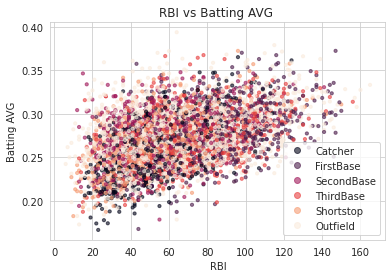

In [ ]:
import matplotlib.pyplot as plt
scatter = plt.scatter(bfs_num.RBI, bfs_num.AVG, c=bfs_num.POS.astype('category').cat.codes, alpha = 0.6, s=10, )
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.xlabel('RBI')
plt.ylabel('Batting AVG')
plt.title('RBI vs Batting AVG ')

In [ ]:
kmeans1 = KMeans(n_clusters=6, random_state=7)

In [ ]:
bfs_num['cluster1'] = kmeans1.fit_predict(bfs_num[['AVG', 'salary']])

In [ ]:
centroids = kmeans.cluster_centers_
cen_x1 = [i[0] for i in centroids]
cen_y1 = [i[1] for i in centroids]



In [ ]:
bfs_num['cen_x1'] = bfs_num.cluster.map({0:cen_x1[0], 1:cen_x1[1], 2:cen_x1[2]})
bfs_num['cen_y1'] = bfs_num.cluster.map({0:cen_y1[0], 1:cen_y1[1], 2:cen_y1[2]})


In [ ]:
classes = ['Catcher','FirstBase','SecondBase','ThirdBase','Shortstop','Outfield']

Text(0.5, 1.0, 'Batting AVG vs Salary ')

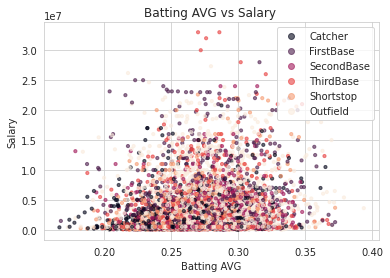

In [ ]:
import matplotlib.pyplot as plt
scatter1 = plt.scatter(bfs_num.AVG, bfs_num.salary, c=bfs_num.POS.astype('category').cat.codes, alpha = 0.6, s=10, )
plt.legend(handles=scatter1.legend_elements()[0], labels=classes)
plt.xlabel('Batting AVG')
plt.ylabel('Salary')
plt.title('Batting AVG vs Salary ')

In [ ]:
bfs_num['cluster1'] = kmeans1.fit_predict(bfs_num[['HR', 'salary']])

Text(0.5, 1.0, 'Home Runs vs Salary ')

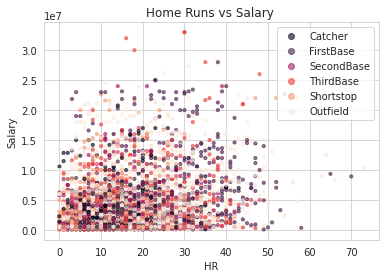

In [ ]:
import matplotlib.pyplot as plt
scatter1 = plt.scatter(bfs_num.HR, bfs_num.salary, c=bfs_num.POS.astype('category').cat.codes, alpha = 0.6, s=10, )
plt.legend(handles=scatter1.legend_elements()[0], labels=classes)
plt.xlabel('HR')
plt.ylabel('Salary')
plt.title('Home Runs vs Salary ')